In [2]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
import helpers
import acquire

In this notebook I will be exploring the two wine datasets concatonated together with the hopes of finding features that will be generalizable to both wine datasets.

In [3]:
df = acquire.both_get_data()
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
full = df.copy()

In [5]:
len(full), len(full.drop_duplicates())

(5320, 5320)

## Drop duplicates + training split

In [6]:
df = df.drop_duplicates()

In [7]:
df, _ , _ = helpers.prep.train_test_validate_split(df)

I also define a simple function that focuses in on the specific dataset for when I want to examine the wines separately.

In [8]:
def red(): return df[df.type =='red']
def white(): return df[df.type =='white']

In [9]:
len(red()), len(white())

(804, 2388)

In [10]:
# Temporarily upsample red wines so more easily compare distributions
xf = helpers.prep.upsample_target(df, 'type', 'red')

In [11]:
xf = xf.reset_index().drop(columns='index')

In [12]:
xf.type.value_counts()

white    2388
red      2387
Name: type, dtype: int64

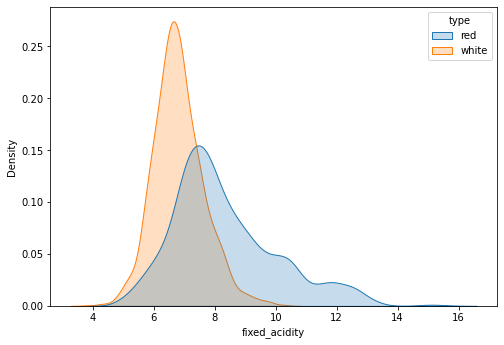

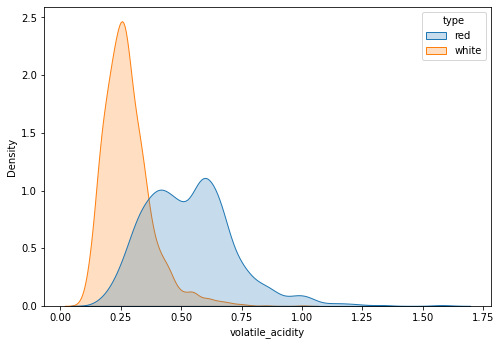

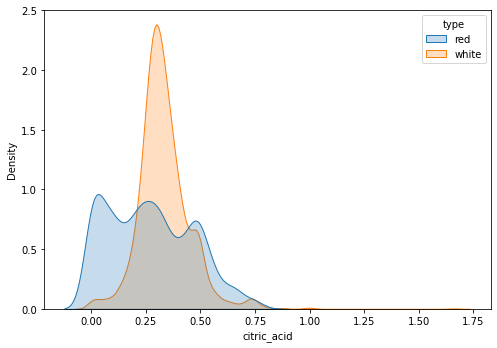

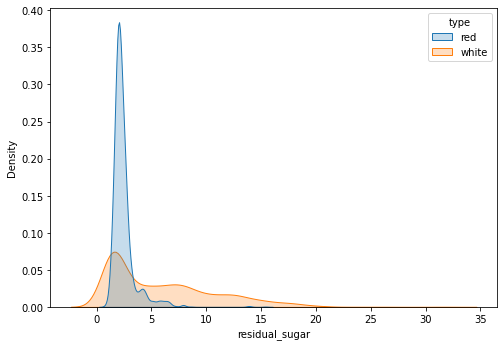

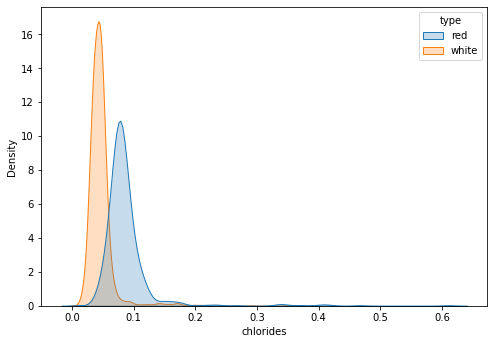

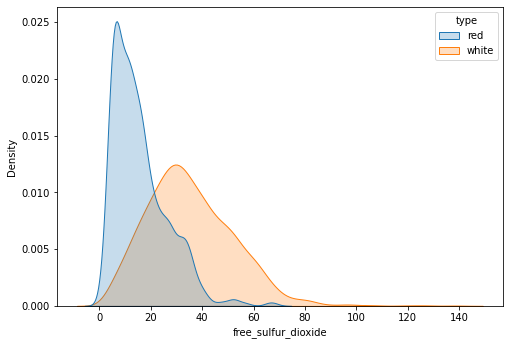

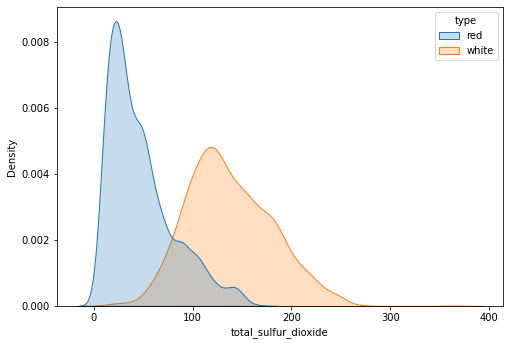

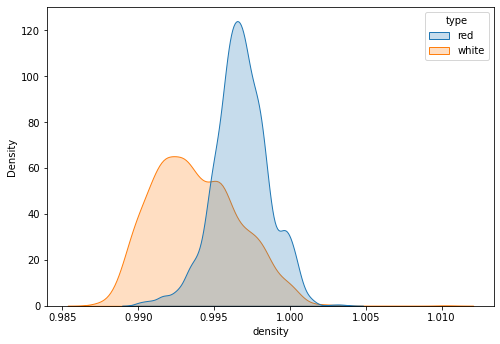

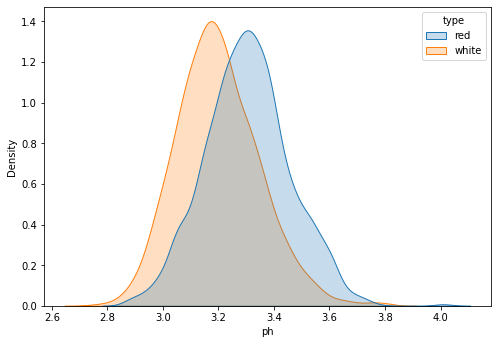

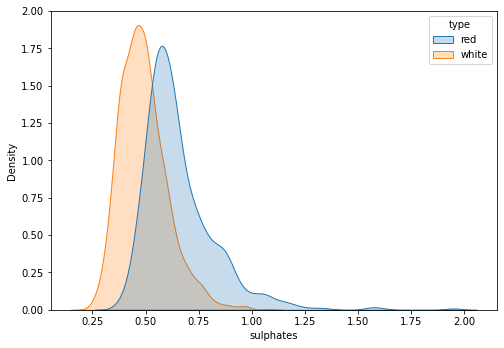

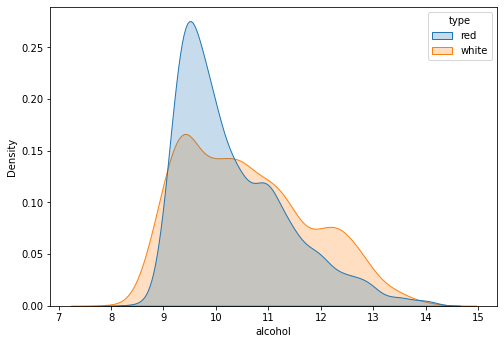

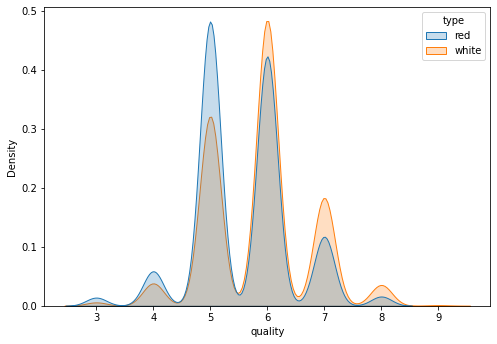

In [13]:
for col in df.drop(columns=['type']):
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=xf, x=col, hue='type', shade=True)

The only columns that featured a lot of overlap were:
- ph
- sulphates
- quality

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


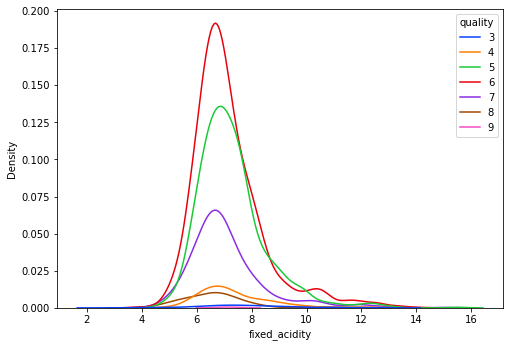

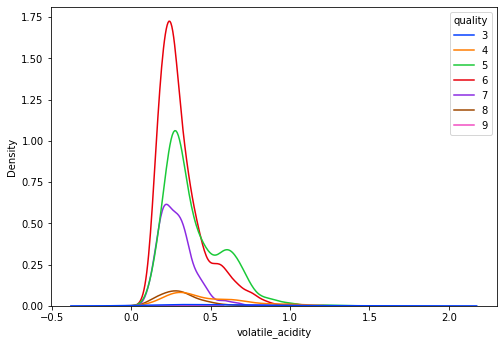

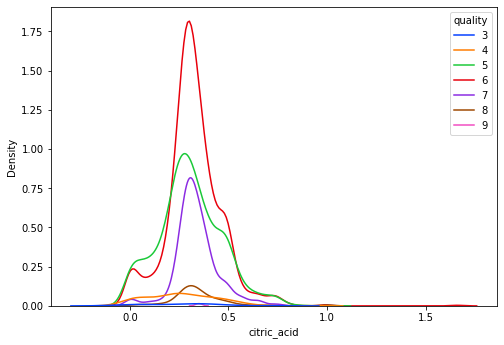

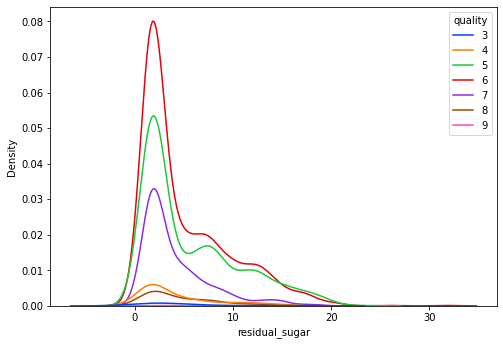

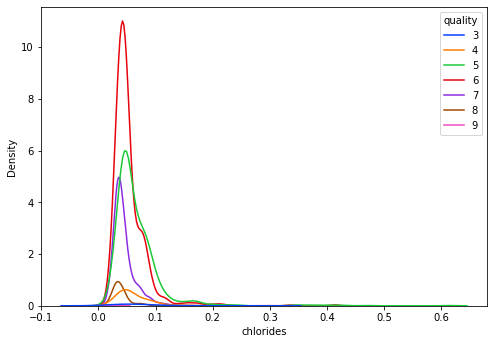

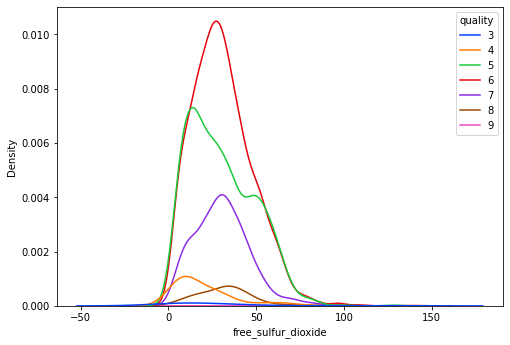

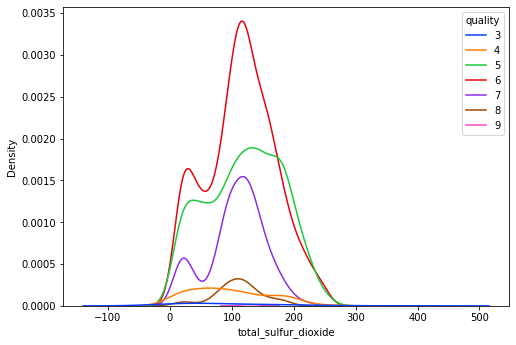

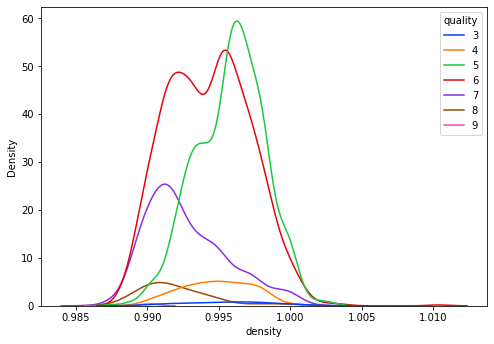

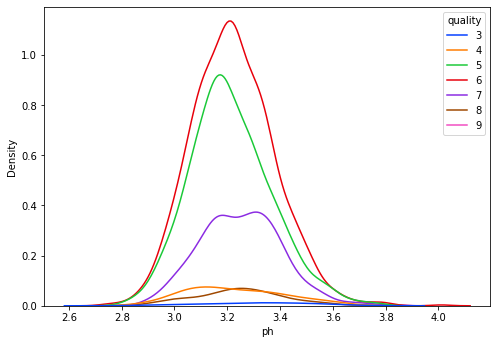

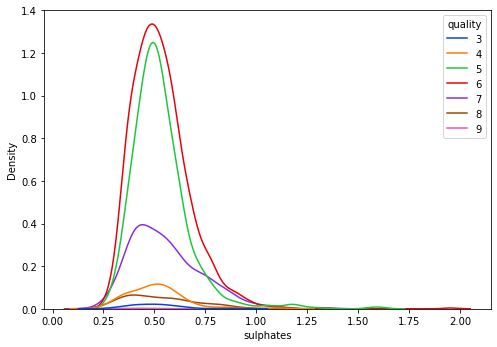

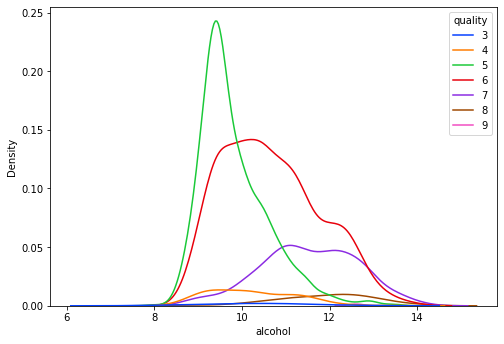

In [14]:
for col in df.drop(columns=['quality', 'type']):
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=df, x=col, hue='quality', shade=False, palette='bright')

In [15]:
helpers.stats.spearman_correllation_test(df, 'quality', 'alcohol')

{'reject': True,
 'h0': "The samples of 'quality' and 'alcohol' are independant",
 'stat_name': 'correlation',
 'stat': 0.4963744633566496,
 'p_value': 3.198128402272775e-198,
 'alpha': 0.05}

In [16]:
helpers.stats.pearson_correllation_test(df, 'quality', 'alcohol')

{'reject': True,
 'h0': "The samples of 'quality' and 'alcohol' are independant",
 'stat_name': 'correlation',
 'stat': 0.4795667083458223,
 'p_value': 2.726482309971315e-183,
 'alpha': 0.05}

[Text(0.5, 1.0, 'white')]

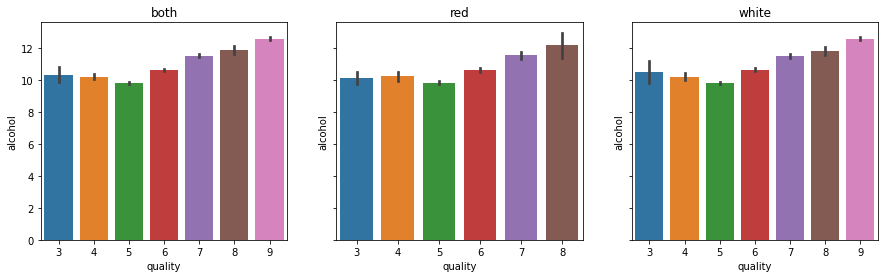

In [17]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=[15,4])
sns.barplot(data= df, x='quality', y='alcohol', ax=axs[0]).set(title='both')
sns.barplot(data= red(), x='quality', y='alcohol', ax=axs[1]).set(title='red')
sns.barplot(data= white(), x='quality', y='alcohol', ax=axs[2]).set(title='white')

# Hypothesis testing

### Hypothesis: Sugar and alcohol content directly to correlates to wine density


In [18]:
df.corr().density.sort_values()

alcohol                -0.695474
quality                -0.350566
total_sulfur_dioxide    0.007885
ph                      0.007973
free_sulfur_dioxide     0.016192
citric_acid             0.090238
sulphates               0.283913
volatile_acidity        0.309598
chlorides               0.389107
fixed_acidity           0.490474
residual_sugar          0.512990
density                 1.000000
Name: density, dtype: float64

In [19]:
white().corr().density.sort_values()

alcohol                -0.793918
quality                -0.366005
ph                     -0.102528
volatile_acidity        0.050721
sulphates               0.075119
citric_acid             0.152365
fixed_acidity           0.270424
chlorides               0.275460
free_sulfur_dioxide     0.324869
total_sulfur_dioxide    0.551441
residual_sugar          0.822819
density                 1.000000
Name: density, dtype: float64

In [20]:
red().corr().density.sort_values()

alcohol                -0.496312
ph                     -0.344494
quality                -0.163482
volatile_acidity       -0.012538
free_sulfur_dioxide     0.006984
total_sulfur_dioxide    0.094529
sulphates               0.148932
chlorides               0.199346
residual_sugar          0.358100
citric_acid             0.368134
fixed_acidity           0.678296
density                 1.000000
Name: density, dtype: float64

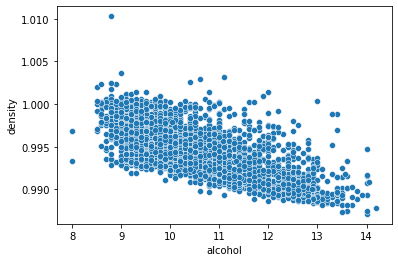

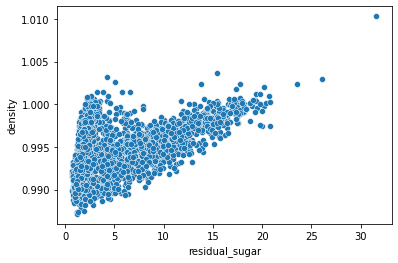

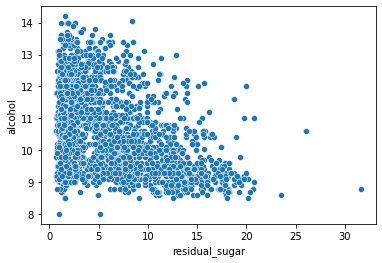

In [21]:
sns.scatterplot(data=df, x='alcohol', y='density', )
plt.show()
sns.scatterplot(data=df, x='residual_sugar', y='density', )
plt.show()
sns.scatterplot(data=df, x='residual_sugar', y='alcohol', )
plt.show()

#### Takeaways
This hypothesis seems to be spot on.  Alcohol in inversely correlated with -0.67 and sugar is positively correlated with 0.56

### Hypothesis: For white wines, the higher acid content the higher quality


In [22]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6,red
3936,6.5,0.28,0.35,9.8,0.067,61.0,180.0,0.99720,3.15,0.57,9.0,4,white
3914,7.7,0.42,0.38,8.1,0.061,49.0,144.0,0.99660,3.40,0.58,11.0,6,white
5272,5.4,0.30,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.6,7,white
3687,8.7,0.15,0.30,1.6,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,6,white


In [23]:
df['col'] = 'blue'

##### **Volatile Acidity**

In [24]:
helpers.stats.spearman_correllation_test(df, 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(df, 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.25818891135982974,
  'p_value': 8.885288085546548e-50,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.27573436223162257,
  'p_value': 8.562610356437525e-57,
  'alpha': 0.05})

In [25]:
helpers.stats.spearman_correllation_test(red(), 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(red(), 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.4160024691660152,
  'p_value': 5.439528583009112e-35,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.43001594635769597,
  'p_value': 1.6088724514573353e-37,
  'alpha': 0.05})

In [26]:
helpers.stats.spearman_correllation_test(white(), 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(white(), 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.1755027729396877,
  'p_value': 5.67242331226083e-18,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.16880798081166604,
  'p_value': 1.0023073655797372e-16,
  'alpha': 0.05})

##### **Fixed Acidity**

In [27]:
helpers.stats.pearson_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.08309027167540838,
 'p_value': 2.592612016709166e-06,
 'alpha': 0.05}

##### **Citric Acid**

In [28]:
helpers.stats.spearman_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.11046800345272442,
 'p_value': 3.9016139431317936e-10,
 'alpha': 0.05}

In [29]:
helpers.stats.pearson_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.08309027167540838,
 'p_value': 2.592612016709166e-06,
 'alpha': 0.05}

In [30]:
helpers.stats.spearman_correllation_test(red(), 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.14400370975228452,
 'p_value': 4.1631143872037e-05,
 'alpha': 0.05}

In [31]:
helpers.stats.pearson_correllation_test(red(), 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.1441764929354844,
 'p_value': 4.0746616601721293e-05,
 'alpha': 0.05}

In [32]:
helpers.stats.spearman_correllation_test(white(), 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.09616577715354359,
 'p_value': 2.504011997919526e-06,
 'alpha': 0.05}

In [33]:
helpers.stats.pearson_correllation_test(white(), 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.12779182649356996,
 'p_value': 3.674421620388302e-10,
 'alpha': 0.05}

##### **Viz**

[Text(0.5, 1.0, 'white')]

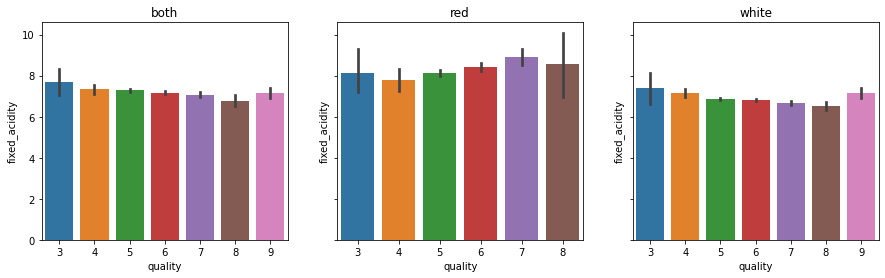

In [34]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=[15,4])
sns.barplot(data= df, x='quality', y='fixed_acidity', ax=axs[0]).set(title='both')
sns.barplot(data= red(), x='quality', y='fixed_acidity', ax=axs[1]).set(title='red')
sns.barplot(data= white(), x='quality', y='fixed_acidity', ax=axs[2]).set(title='white')

[Text(0.5, 1.0, 'white')]

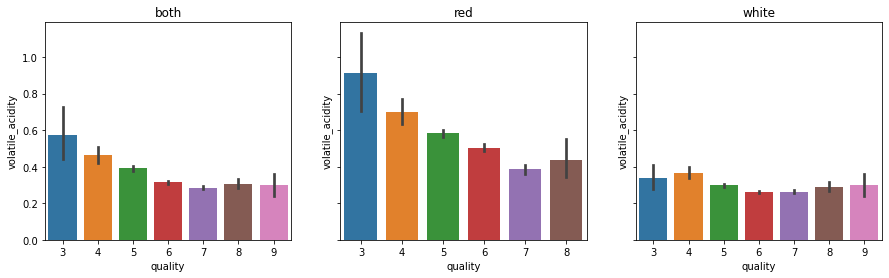

In [35]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=[15,4])
sns.barplot(data= df, x='quality', y='volatile_acidity', ax=axs[0]).set(title='both')
sns.barplot(data= red(), x='quality', y='volatile_acidity', ax=axs[1]).set(title='red')
sns.barplot(data= white(), x='quality', y='volatile_acidity', ax=axs[2]).set(title='white')

### Hypothesis: For red wines, residual sugar content lowers quality score


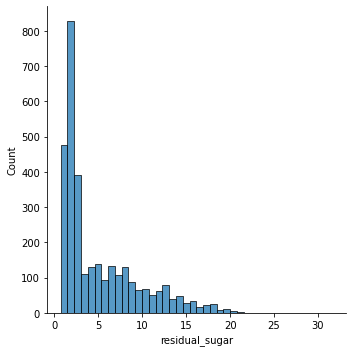

In [36]:
sns.displot(df.residual_sugar)

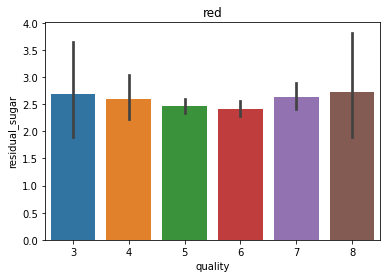

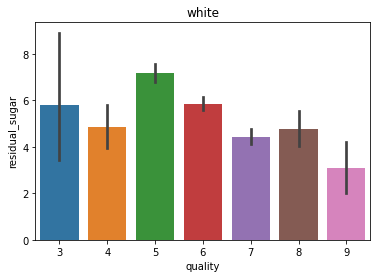

In [37]:
sns.barplot(data=red(), x='quality', y='residual_sugar')
plt.title('red')
plt.show()
sns.barplot(data=white(), x='quality', y='residual_sugar')
plt.title('white')
plt.show()

In [38]:
white()[white().quality == 9]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white,blue
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white,blue


In [39]:
white()[white().quality == 6].mean().T

C:\Users\Crux\AppData\Local\Temp\ipykernel_21732\3635486166.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  white()[white().quality == 6].mean().T


fixed_acidity             6.805915
volatile_acidity          0.260028
citric_acid               0.335416
residual_sugar            5.849399
chlorides                 0.044323
free_sulfur_dioxide      35.340573
total_sulfur_dioxide    136.123383
density                   0.993639
ph                        3.196275
sulphates                 0.490351
alcohol                  10.665881
quality                   6.000000
dtype: float64

In [40]:
df[df.quality == 8].volatile_acidity.describe(),\
df[df.quality == 8].residual_sugar.describe()

(count    89.000000
 mean      0.307303
 std       0.129382
 min       0.120000
 25%       0.220000
 50%       0.290000
 75%       0.360000
 max       0.850000
 Name: volatile_acidity, dtype: float64,
 count    89.000000
 mean      4.526966
 std       3.437312
 min       1.000000
 25%       1.800000
 50%       3.200000
 75%       6.800000
 max      14.100000
 Name: residual_sugar, dtype: float64)

### Hypothesis: Sulfates will have negative impact on quality for both


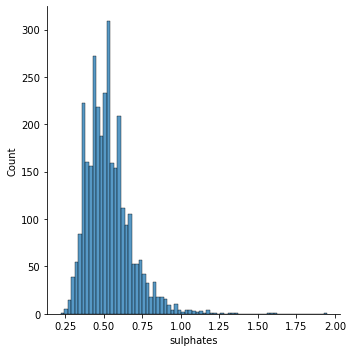

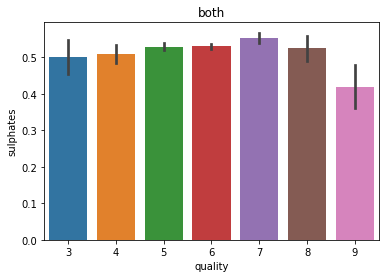

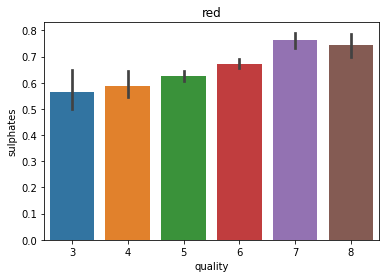

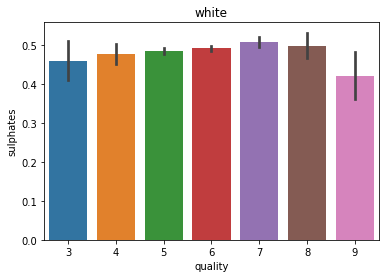

In [41]:
sns.displot(df.sulphates)
plt.show()
sns.barplot(data=df, x='quality', y='sulphates')
plt.title('both')
plt.show()
sns.barplot(data=red(), x='quality', y='sulphates')
plt.title('red')
plt.show()
sns.barplot(data=white(), x='quality', y='sulphates')
plt.title('white')
plt.show()

### Hypothesis: High volitile acid content lowers quality for both


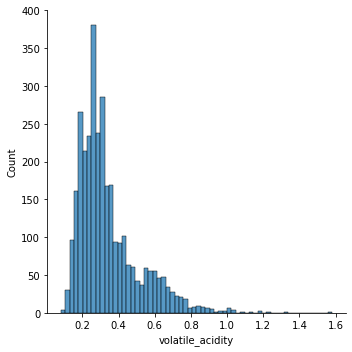

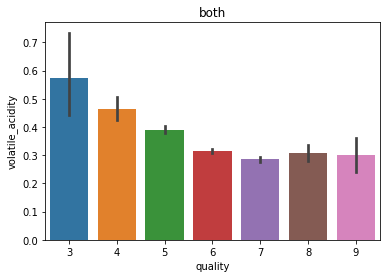

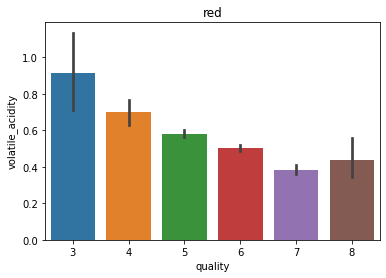

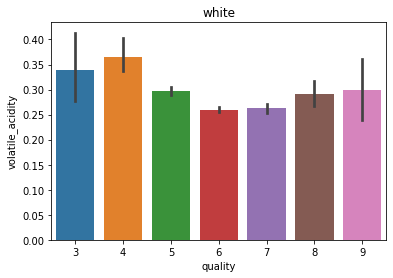

In [42]:
sns.displot(df.volatile_acidity)
plt.show()
sns.barplot(data=df, x='quality', y='volatile_acidity')
plt.title('both')
plt.show()
sns.barplot(data=red(), x='quality', y='volatile_acidity')
plt.title('red')
plt.show()
sns.barplot(data=white(), x='quality', y='volatile_acidity')
plt.title('white')
plt.show()

### Hypothesis: White and red wines may need predicted separately

U.S. legal limits of Volatile Acidity:   
Red Table Wine 1.2 g/L  
White Table Wine 1.1 g/L

In [43]:
df.volatile_acidity.describe()

count    3192.000000
mean        0.342240
std         0.169549
min         0.080000
25%         0.230000
50%         0.290000
75%         0.410000
max         1.580000
Name: volatile_acidity, dtype: float64

In [44]:
df[df.volatile_acidity > 1.1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5,red,blue
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,red,blue
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5,red,blue
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5,red,blue
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red,blue
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,red,blue


In [45]:
df.quality.describe()

count    3192.000000
mean        5.783521
std         0.880054
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

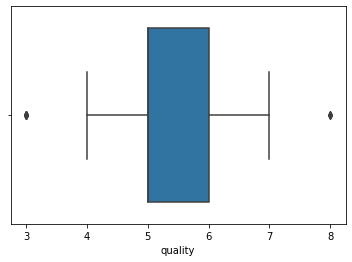

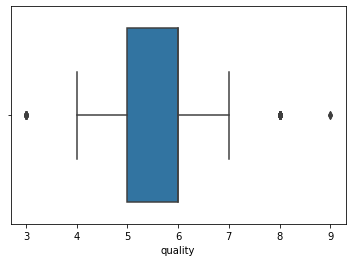

In [46]:
sns.boxplot(data = df[df.volatile_acidity > .6], x='quality')
plt.show()
sns.boxplot(data = df[df.volatile_acidity < .6], x='quality')
plt.show()

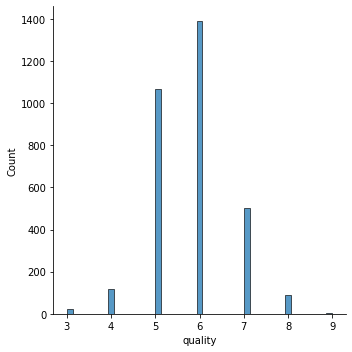

In [47]:
sns.displot(data=df, x='quality')

In [48]:
df.corr().density, red().corr().density, white().corr().density

(fixed_acidity           0.490474
 volatile_acidity        0.309598
 citric_acid             0.090238
 residual_sugar          0.512990
 chlorides               0.389107
 free_sulfur_dioxide     0.016192
 total_sulfur_dioxide    0.007885
 density                 1.000000
 ph                      0.007973
 sulphates               0.283913
 alcohol                -0.695474
 quality                -0.350566
 Name: density, dtype: float64,
 fixed_acidity           0.678296
 volatile_acidity       -0.012538
 citric_acid             0.368134
 residual_sugar          0.358100
 chlorides               0.199346
 free_sulfur_dioxide     0.006984
 total_sulfur_dioxide    0.094529
 density                 1.000000
 ph                     -0.344494
 sulphates               0.148932
 alcohol                -0.496312
 quality                -0.163482
 Name: density, dtype: float64,
 fixed_acidity           0.270424
 volatile_acidity        0.050721
 citric_acid             0.152365
 residual_sugar   

Is PH a reflection of the 3 acids columns?

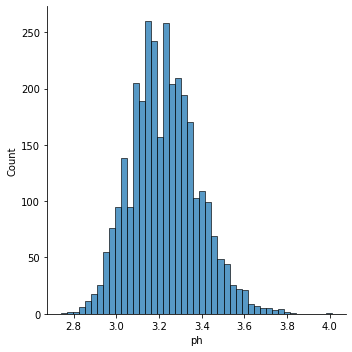

In [49]:
sns.displot(df.ph)

<AxesSubplot:>

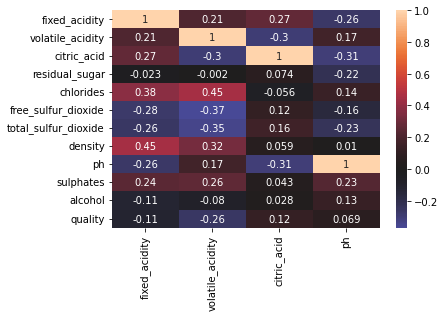

In [50]:
c = df.corr(method='spearman')[['fixed_acidity','volatile_acidity','citric_acid','ph']]
sns.heatmap(c, center=0, annot=True)

### Is total SO2 - free S02 indicative of age / quality?

In [51]:
df['bound_sulfur_dioxide'] = df.total_sulfur_dioxide - df.free_sulfur_dioxide
df['bound_sulfur_dioxide'].describe()


count    3192.000000
mean       84.226504
std        45.299699
min         3.000000
25%        54.000000
50%        85.000000
75%       114.000000
max       331.000000
Name: bound_sulfur_dioxide, dtype: float64

In [52]:
df.corr(method='spearman').bound_sulfur_dioxide

fixed_acidity          -0.227180
volatile_acidity       -0.302996
citric_acid             0.152447
residual_sugar          0.402072
chlorides              -0.260699
free_sulfur_dioxide     0.567247
total_sulfur_dioxide    0.958928
density                 0.014728
ph                     -0.234623
sulphates              -0.255515
alcohol                -0.284706
quality                -0.088713
bound_sulfur_dioxide    1.000000
Name: bound_sulfur_dioxide, dtype: float64

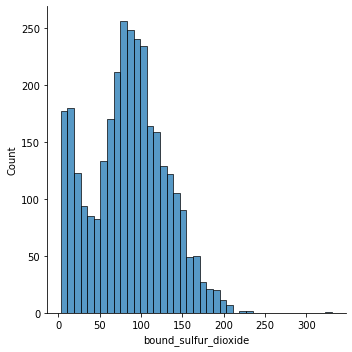

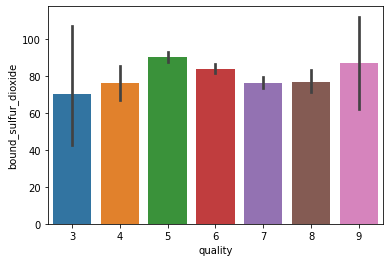

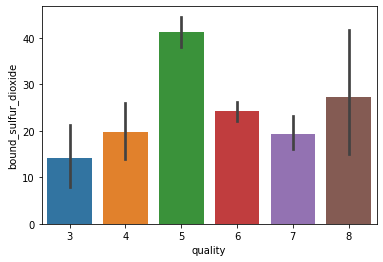

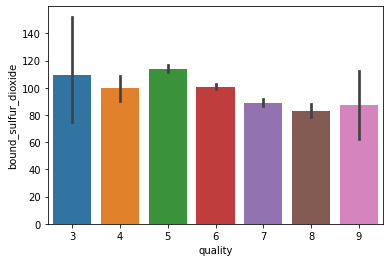

In [53]:
sns.displot(df.bound_sulfur_dioxide)
plt.show()
sns.barplot(data=df, x='quality', y='bound_sulfur_dioxide')
plt.show()
sns.barplot(data=red(), x='quality', y='bound_sulfur_dioxide')
plt.show()
sns.barplot(data=white(), x='quality', y='bound_sulfur_dioxide')
plt.show()

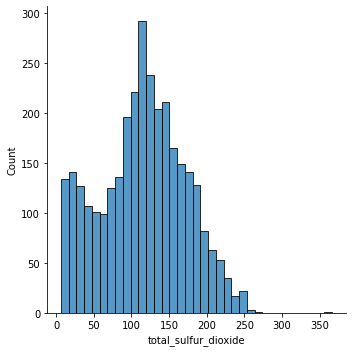

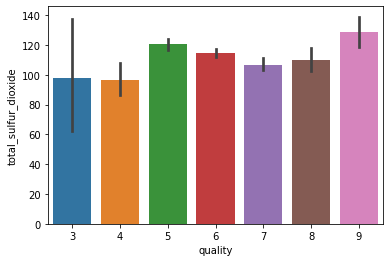

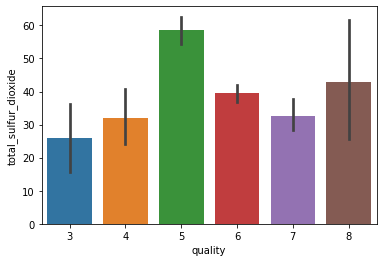

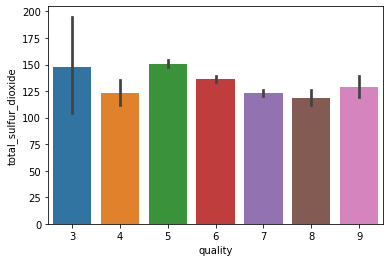

In [54]:
sns.displot(df.total_sulfur_dioxide)
plt.show()
sns.barplot(data=df, x='quality', y='total_sulfur_dioxide')
plt.show()
sns.barplot(data=red(), x='quality', y='total_sulfur_dioxide')
plt.show()
sns.barplot(data=white(), x='quality', y='total_sulfur_dioxide')
plt.show()

### Can I extract total sulfur dioxide as a polynomial feature for red wines?

<AxesSubplot:xlabel='quality', ylabel='bound_sulfur_dioxide'>

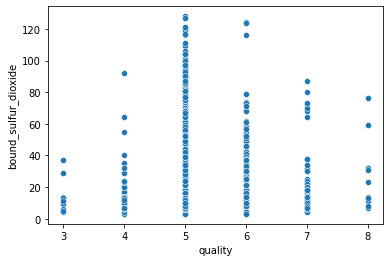

In [55]:
sns.scatterplot(data = red(), x='quality', y='bound_sulfur_dioxide')

<AxesSubplot:xlabel='quality', ylabel='bound_sulfur_dioxide'>

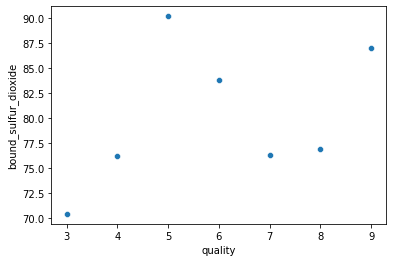

In [56]:
temp = df.groupby('quality').bound_sulfur_dioxide.mean().reset_index()
sns.scatterplot(data = temp, x='quality', y='bound_sulfur_dioxide')

In [57]:
mapping = {3:1,4:1,5:2,6:2,7:2,8:3,9:3}
df['binned_quality'] = df.quality.map(mapping)

<AxesSubplot:xlabel='binned_quality', ylabel='bound_sulfur_dioxide'>

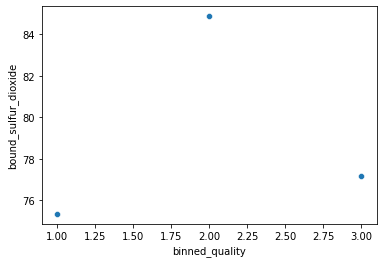

In [58]:
temp = df.groupby('binned_quality').bound_sulfur_dioxide.mean().reset_index()
sns.scatterplot(data = temp, x='binned_quality', y='bound_sulfur_dioxide')

## tri-variate exploration

In [59]:
xf = df[(df.quality > 6)| (df.quality < 5)]

In [60]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col,bound_sulfur_dioxide,binned_quality
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6,red,blue,32.0,2
3936,6.5,0.28,0.35,9.8,0.067,61.0,180.0,0.99720,3.15,0.57,9.0,4,white,blue,119.0,1
3914,7.7,0.42,0.38,8.1,0.061,49.0,144.0,0.99660,3.40,0.58,11.0,6,white,blue,95.0,2
5272,5.4,0.30,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.6,7,white,blue,68.0,2
3687,8.7,0.15,0.30,1.6,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,6,white,blue,101.0,2


In [61]:
import plotly.express as px
fig = px.scatter_3d(xf, 
                    x='residual_sugar', 
                    y='chlorides', 
                    z='alcohol',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [62]:
import plotly.express as px
fig = px.scatter_3d(xf, 
                    x='free_sulfur_dioxide', 
                    y='total_sulfur_dioxide', 
                    z='sulphates',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [63]:
xf.corr().quality

fixed_acidity          -0.121999
volatile_acidity       -0.433295
citric_acid             0.225928
residual_sugar         -0.004320
chlorides              -0.328484
free_sulfur_dioxide     0.206199
total_sulfur_dioxide    0.084949
density                -0.334963
ph                      0.010862
sulphates               0.078215
alcohol                 0.444497
quality                 1.000000
bound_sulfur_dioxide    0.015330
binned_quality          0.925243
Name: quality, dtype: float64

In [64]:
xf.corr().volatile_acidity

fixed_acidity           0.128847
volatile_acidity        1.000000
citric_acid            -0.401267
residual_sugar         -0.071724
chlorides               0.424484
free_sulfur_dioxide    -0.360128
total_sulfur_dioxide   -0.382145
density                 0.254912
ph                      0.203602
sulphates               0.075834
alcohol                -0.007817
quality                -0.433295
bound_sulfur_dioxide   -0.319160
binned_quality         -0.340872
Name: volatile_acidity, dtype: float64

In [65]:
xf2 = xf[xf.chlorides < 0.12]

In [66]:
import plotly.express as px
xf = df[(df.quality > 7)| (df.quality < 5)]
fig = px.scatter_3d(xf2, 
                    x='chlorides', 
                    y='volatile_acidity', 
                    z='alcohol',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [67]:
import plotly.express as px
xf = df[(df.quality > 7)| (df.quality < 5)]
fig = px.scatter_3d(xf2, 
                    x='residual_sugar', 
                    y='volatile_acidity', 
                    z='alcohol',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [68]:
p = sns.color_palette('rocket', as_cmap=True)

<AxesSubplot:xlabel='alcohol', ylabel='volatile_acidity'>

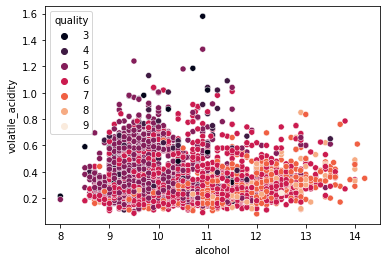

In [69]:
sns.scatterplot(data=df, y='volatile_acidity', x='alcohol', hue='quality', palette=p )

<AxesSubplot:xlabel='alcohol', ylabel='volatile_acidity'>

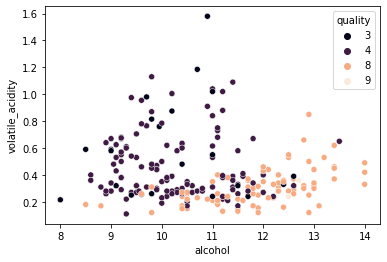

In [70]:
sns.scatterplot(data=xf, y='volatile_acidity', x='alcohol', hue='quality', palette=p )

# Vinegar flavor bins

Based on an article from [Winemag](https://www.winemag.com/2021/11/09/volatile-acidity-wine/) we learned that volatile acidity is indicative of acetic acids like those found in vinegar.  The article claims that volatile activity becomes noticable in the 0.6 - 0.9 g/L range, and our data seems to back up that claim.

<AxesSubplot:xlabel='volatile_acidity'>

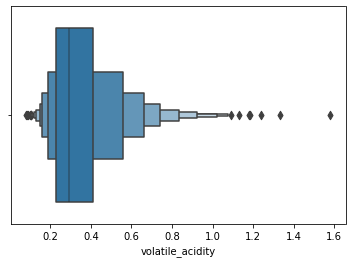

In [71]:
sns.boxenplot( x= df.volatile_acidity )

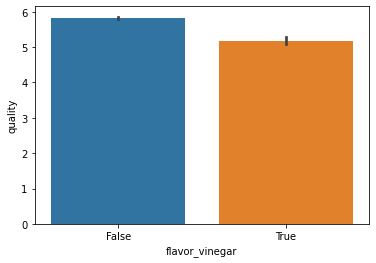

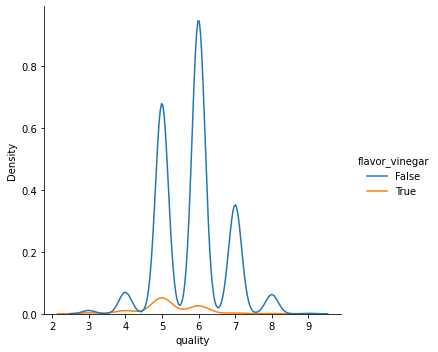

In [72]:
df['flavor_vinegar'] = df.volatile_acidity > 0.65
sns.barplot(data=df, x='flavor_vinegar', y='quality')
plt.show()
sns.displot(data=df, x='quality', kind='kde', hue='flavor_vinegar')
plt.show()

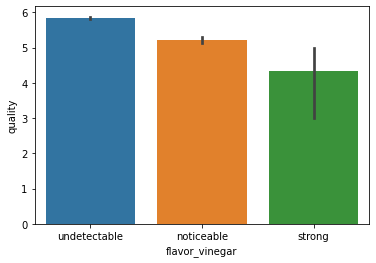

In [114]:
bins = [-np.inf, 0.6, 1.2, np.inf]
labels = ['undetectable','noticeable','strong']

df['flavor_vinegar'] = pd.cut(df.volatile_acidity, bins=bins, labels=labels)
sns.barplot(data=df, x='flavor_vinegar', y='quality')
plt.show()
# sns.displot(data=df, x='quality', kind='kde', hue='flavor_vinegar')
# plt.show()
# sns.displot(data=df[df.flavor_vinegar != 'undetectable'], x='quality', kind='kde', hue='flavor_vinegar')
# plt.show()

<AxesSubplot:xlabel='flavor_vinegar', ylabel='quality'>

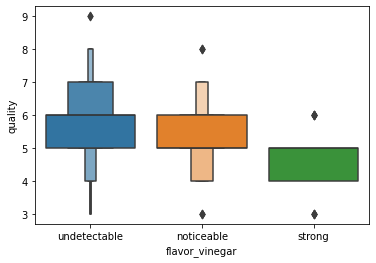

In [120]:
bins = [-np.inf, 0.6, .9, np.inf]
labels = ['undetectable','noticeable','strong']

df['flavor_vinegar'] = pd.cut(df.volatile_acidity, bins=bins, labels=labels)
sns.boxenplot(data=df, x='flavor_vinegar', y='quality')

C:\Users\Crux\AppData\Local\Temp\ipykernel_21732\4069728858.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='flavor_vinegar', ylabel='quality'>

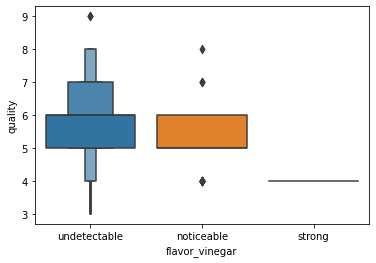

In [122]:
w = white()
w['flavor_vinegar'] = pd.cut(w.volatile_acidity, bins=bins, labels=labels)
sns.boxenplot(data=w, x='flavor_vinegar', y='quality')

In [124]:
w[w.flavor_vinegar == 'strong']

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col,bound_sulfur_dioxide,binned_quality,flavor_vinegar,us_legal,eu_legal,flavor_profile
3550,9.9,1.005,0.46,1.4,0.046,34.0,185.0,0.9966,3.02,0.49,10.2,4,white,blue,151.0,1,strong,True,True,3


C:\Users\Crux\AppData\Local\Temp\ipykernel_21732\2578508407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='flavor_vinegar', ylabel='quality'>

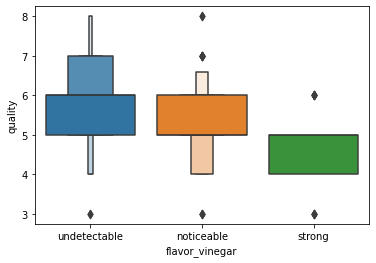

In [123]:
r = red()
r['flavor_vinegar'] = pd.cut(r.volatile_acidity, bins=bins, labels=labels)
sns.boxenplot(data=r, x='flavor_vinegar', y='quality')

# US / EU wine legality

The US and EU impose regulations on the production of wine, limiting the amount of certain subtances that are allowed in wines.  The rules we found are as follows:

### US
**Red Wine**
- S02: 350mg/L
- Volatile Acids: 1.4g/L

**White Wine**
- SO2: 350mg/L
- Volatile Acids: 1.5g/L

[source 1](https://www.wineshopathome.com/understanding-sulfur-levels-wine/)
[source 2](https://www.law.cornell.edu/cfr/text/27/4.21)



### EU
**Red Wine**
- SO2: 150 mg/l for red wines with a sugar content of less than 5 g/l;
- SO2: 250 mg/l for red, rosé and white wines with a sugar content not less than 5 g/l and less than 35 g/l;
- Volatile Acids: 1.2g/L

**White Wine**
- SO2: 200 mg/l for white and rosé wines with a sugar content of less than 5g/l;
- SO2: 250 mg/l for red, rosé and white wines with a sugar content not less than 5 g/l and less than 35 g/l;
- SO2: 400 mg/l for sweet white wines with a sugar content more than 35 g/l;
- Volatile Acids: 1.08g/L

[source 3](https://www.mpi.govt.nz/dmsdocument/34896-European-Union-Wine-OMAR)


In [74]:
df[df.volatile_acidity > 1.4]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col,bound_sulfur_dioxide,binned_quality,flavor_vinegar
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,red,blue,4.0,1,strong


In [75]:
df.free_sulfur_dioxide.describe()

count    3192.000000
mean       30.304198
std        17.671177
min         1.000000
25%        16.750000
50%        28.000000
75%        41.000000
max       138.500000
Name: free_sulfur_dioxide, dtype: float64

In [76]:
def is_us_legal(row):
    legal = True
    if row.total_sulfur_dioxide > 350: legal = False
    if row.type == 'red':
        if row.volatile_acidity > 1.4: legal = False
    else:
        if row.volatile_acidity > 1.5: legal = False
    return legal

In [77]:
df['us_legal'] = df.apply(is_us_legal, axis=1)

In [78]:
df[~df.us_legal]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col,bound_sulfur_dioxide,binned_quality,flavor_vinegar,us_legal
1299,7.6,1.58,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red,blue,4.0,1,strong,False
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white,blue,331.0,1,undetectable,False


In [79]:
def is_eu_legal(row):
    legal = True
    sugar = row.residual_sugar
    so2 = row.total_sulfur_dioxide
    acetic = row.volatile_acidity
    if row.type == 'red':
        if acetic > 1.2: 
            return not legal
        if sugar < 5 and so2 > 150: 
            return not legal
        if 5 < sugar < 35 and so2 > 250: 
            return not legal
    else:
        if acetic > 1.08: 
            return not legal
        if sugar < 5 and so2 > 200: 
            return not legal
        if 5 < sugar < 35 and so2 > 250: 
            return not legal
        if 35 < sugar and so2 > 400: 
            return not legal
    return legal

In [80]:
df['eu_legal'] = df.apply(is_eu_legal, axis=1)
df[~df.eu_legal].shape

(42, 19)

<AxesSubplot:xlabel='eu_legal', ylabel='quality'>

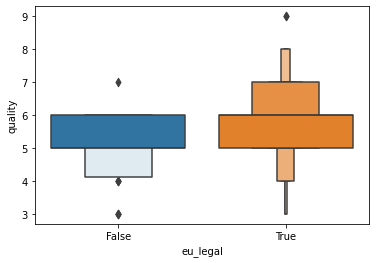

In [116]:
sns.boxenplot(data=df, x='eu_legal', y='quality')

In [82]:
len(full) - full.apply(is_us_legal, axis=1).sum()

3

In [83]:
len(full) - full.apply(is_eu_legal, axis=1).sum()

67

In [84]:
df[~df.eu_legal].quality.value_counts()

5    20
6    15
4     3
3     3
7     1
Name: quality, dtype: int64

In [85]:
df[(~df.eu_legal) & (~df.us_legal)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,col,bound_sulfur_dioxide,binned_quality,flavor_vinegar,us_legal,eu_legal
1299,7.6,1.58,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red,blue,4.0,1,strong,False,False
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white,blue,331.0,1,undetectable,False,False


# Clustering

Scale to square off distances

Cluster on features
- alcohol
- volatile_acidity
- chlorides
- density
- residual_sugar

#### Scaling

In [86]:
feats = ['volatile_acidity','chlorides','residual_sugar','alcohol']
scaler = helpers.prep.train_scaler(df[feats])

scaled_feats = scaler.transform(df[feats])
scaled_df = df.copy()

scaled_df[feats] = scaled_feats

In [87]:
import helpers.cluster


In [88]:
K = 4

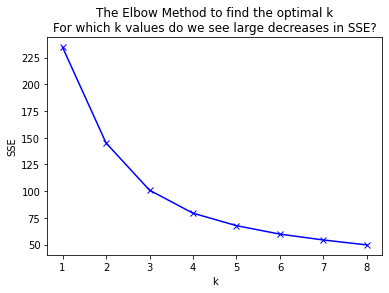

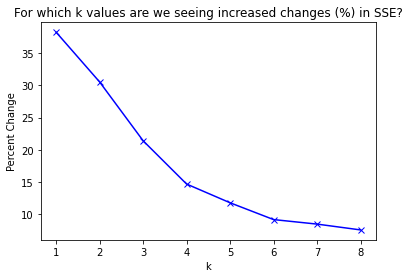

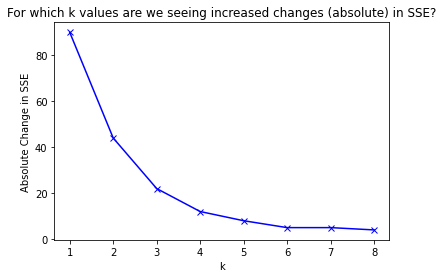

,k,sse,delta,pct_delta
0,1,234.676339,90.0,38.2
1,2,145.102997,44.0,30.5
2,3,100.879118,22.0,21.4
3,4,79.336923,12.0,14.7
4,5,67.674513,8.0,11.8
5,6,59.721235,5.0,9.2
6,7,54.253567,5.0,8.5
7,8,49.633916,4.0,7.6


In [89]:
helpers.cluster.find_k(scaled_df, feats, range(1,10))

In [90]:
clusterer = helpers.cluster.build_kmeans_clusterer(df=scaled_df, cols=feats, k=K)

In [91]:
df['flavor_profile']  = helpers.cluster.get_kmeans_clusters(scaled_df, feats, k=K, clusterer=clusterer)

[Text(0.5, 1.0, 'white')]

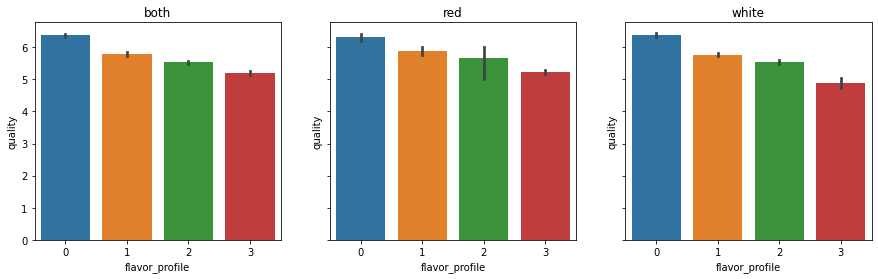

In [92]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=[15,4])
sns.barplot(data= df, x='flavor_profile', y='quality', ax=axs[0]).set(title='both')
sns.barplot(data= red(), x='flavor_profile', y='quality', ax=axs[1]).set(title='red')
sns.barplot(data= white(), x='flavor_profile', y='quality', ax=axs[2]).set(title='white')

In [93]:
feats

['volatile_acidity', 'chlorides', 'residual_sugar', 'alcohol']

In [94]:
pd.crosstab(df.binned_quality, df.flavor_profile)

flavor_profile,0,1,2,3
binned_quality,,,,
1,25,39,23,55
2,773,1019,673,494
3,64,20,7,0


In [95]:
pd.crosstab(df.quality, df.flavor_profile)

flavor_profile,0,1,2,3
quality,,,,
3,4,5,3,10
4,21,34,20,45
5,62,346,331,330
6,408,517,305,160
7,303,156,37,4
8,62,20,7,0
9,2,0,0,0


In [96]:
df['flavor_profile'] = df.flavor_profile.astype(str)

In [97]:
import plotly.express as px
fig = px.scatter_3d(df, 
                    x = feats[0],
                    y = feats[3],
                    z = feats[2],
                    color='flavor_profile',
                    )
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [98]:
import plotly.express as px
fig = px.scatter_3d(df, 
                    x = feats[0],
                    y = feats[3],
                    z = feats[2],
                    color='quality',
                    )
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [99]:
white().corr().chlorides

fixed_acidity           0.036387
volatile_acidity        0.095461
citric_acid             0.113814
residual_sugar          0.100494
chlorides               1.000000
free_sulfur_dioxide     0.117749
total_sulfur_dioxide    0.202318
density                 0.275460
ph                     -0.095904
sulphates               0.027315
alcohol                -0.367717
quality                -0.233688
bound_sulfur_dioxide    0.191559
binned_quality         -0.093970
us_legal               -0.010647
eu_legal               -0.022265
Name: chlorides, dtype: float64

<AxesSubplot:xlabel='ph', ylabel='alcohol'>

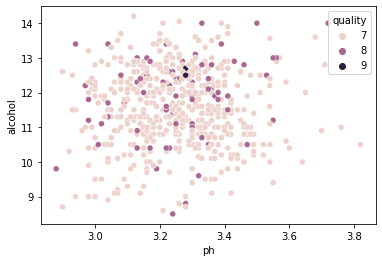

In [100]:
sns.scatterplot(data = df[df.quality > 6], x='ph', y='alcohol', hue='quality')

In [101]:
white().corr().volatile_acidity.sort_values()

quality                -0.168808
citric_acid            -0.162114
binned_quality         -0.110607
free_sulfur_dioxide    -0.094169
ph                     -0.065271
us_legal               -0.055940
eu_legal               -0.054474
sulphates              -0.036473
fixed_acidity          -0.035174
alcohol                 0.035951
density                 0.050721
chlorides               0.095461
total_sulfur_dioxide    0.101485
residual_sugar          0.109195
bound_sulfur_dioxide    0.169977
volatile_acidity        1.000000
Name: volatile_acidity, dtype: float64

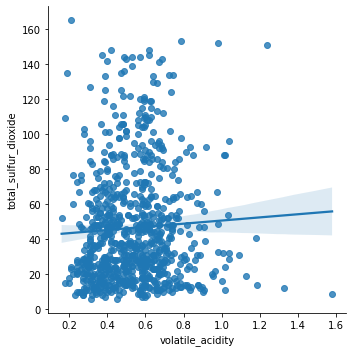

In [102]:
sns.lmplot(data = red(), x='volatile_acidity', y='total_sulfur_dioxide')